In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

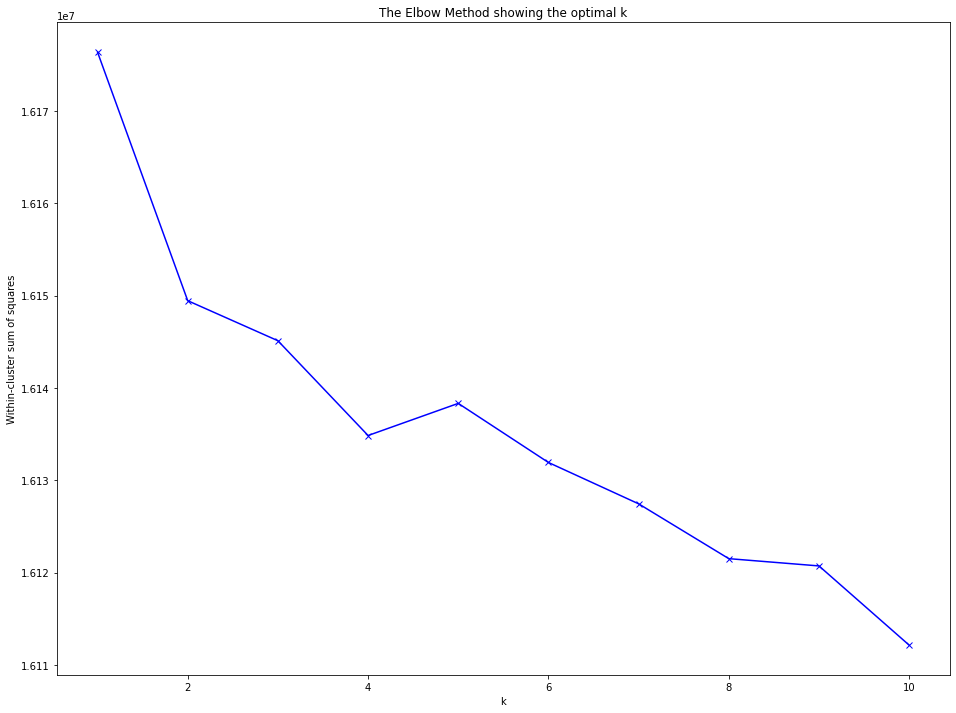

In [5]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores


wcss_vec = count_wcss_scores(X_train, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, "bx-")
plt.xlabel("k")
plt.ylabel("Within-cluster sum of squares")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [6]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)

In [7]:
get_metrics_of_model(kmeans, metrics_list, X_train, X_test)

/home/antoni/miniconda3/envs/wum/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/antoni/miniconda3/envs/wum/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


value                 
sample                         test            train
metric                                              
Silhouette                -0.007529        -0.037323
mean_inclust_dist         51.531919              NaN
min_interclust_dist       30.277689        35.967203
wcss                 3321174.760654  16140383.555904

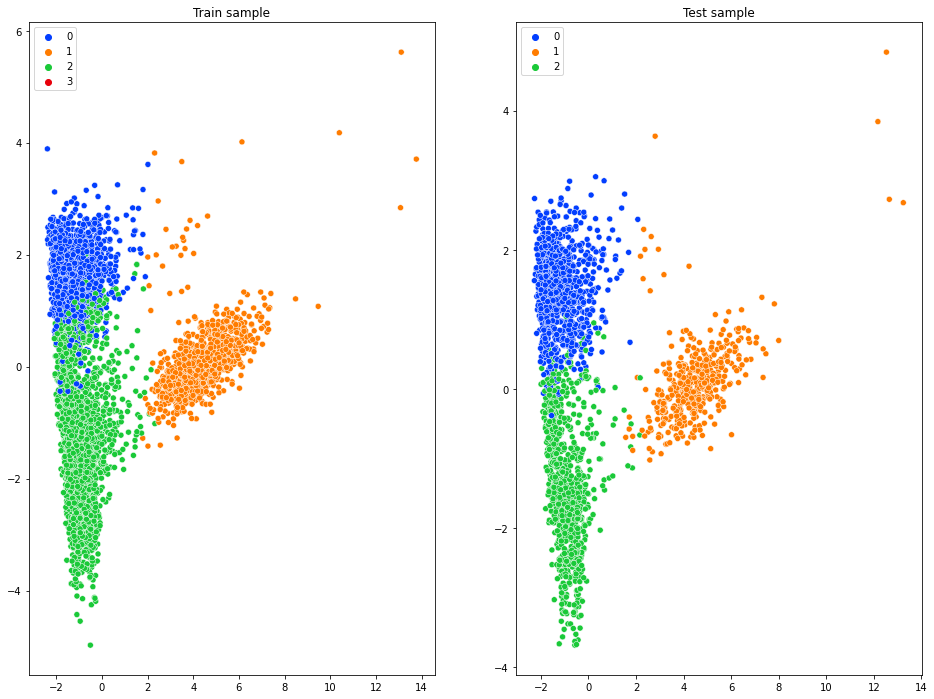

In [8]:
plot_clustering(kmeans, X_train, X_test)

In [9]:
X_train.std(0)

array([1., 1., 1., ..., 1., 1., 1.])

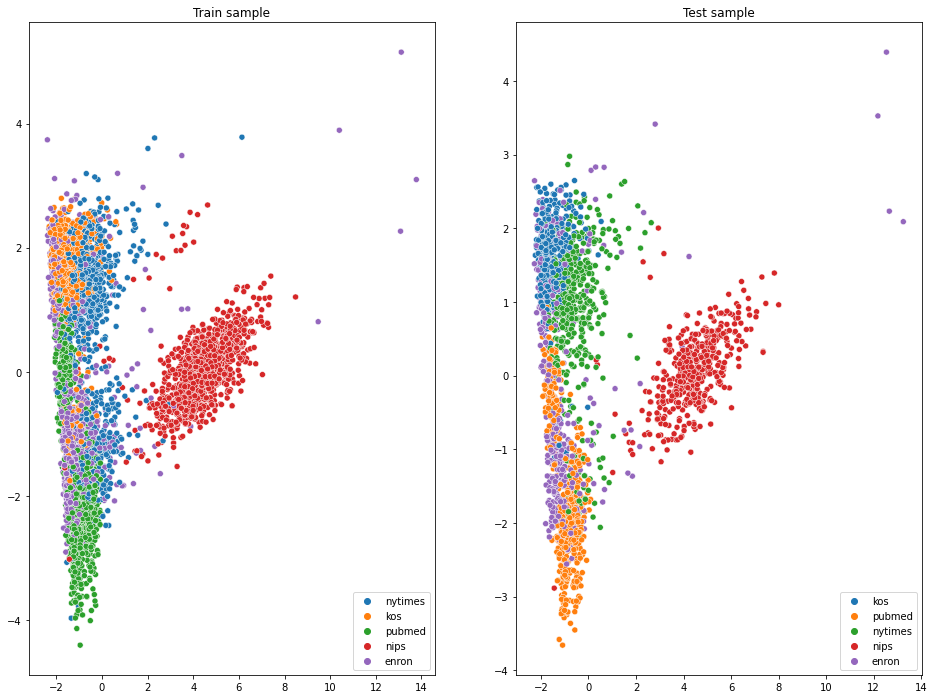

In [10]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)